In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
testdf = {}
baseurl = "https://api.yelp.com/v3/businesses/search"
#testresponse = requests.get(baseurl + "q=restaurants" + "&location='Sacramento'" + "&radius=25000" + "&appid=" + yelpkey)

In [ ]:
testresponse

In [ ]:

headers = {'Authorization': 'Bearer %s' % yelpkey}
params = {'term':'restaurants','location':'Sacramento','limit':50}
# Making a get request to the API
req=requests.get(baseurl, params=params, headers=headers).json()

In [ ]:
dataf = pd.json_normalize(reqjson)

In [ ]:
clean_json = json.loads(json.dumps(req))
sac2df = clean_json['businesses']
sac2df = pd.DataFrame(sac2df)

In [ ]:
sacdf.merge(sac2df, on="name", how='left')

In [ ]:
cleansacdf = pd.DataFrame.append(riolindadf,ignore_index=True,verify_integrity=True)

In [ ]:
cleansacdf

In [ ]:
saccopy = cleansacdf.copy()

In [ ]:
saccopy.drop_duplicates("id")

In [ ]:
saccopy

In [ ]:
mergeddf1 = pd.DataFrame.append(saccopy, riolindadf,ignore_index=True,verify_integrity=True)

In [ ]:
mergeddf1

In [ ]:
mergeddf1.drop_duplicates('id')

In [ ]:
mergeddf1.to_csv('projectdata.csv', index=False)

In [2]:
filepath = "Project1/Final_Yelp_Data.csv"
yelpdf = pd.read_csv(filepath)

In [3]:
yelpdf

,Unnamed: 0,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,price,Unnamed: 0.1
0,0,Y3HNUBQJHAzWnnhk3iReiA,junoon-flavors-of-india-sacramento-2,Junoon Flavors Of India,https://s3-media1.fl.yelpcdn.com/bphoto/P7Pzdg...,False,https://www.yelp.com/biz/junoon-flavors-of-ind...,20,"[{'alias': 'indpak', 'title': 'Indian'}]",5.0,"{'latitude': 38.570471, 'longitude': -121.4571...",[],"{'address1': '3672 J St', 'address2': None, 'a...",1.916943e+10,(916) 942-9796,1267.138005,NaN,NaN
1,1,9GhIDT1D_8-0ZxKDIB2WpA,shake-shack-sacramento,Shake Shack,https://s3-media3.fl.yelpcdn.com/bphoto/TxbovZ...,False,https://www.yelp.com/biz/shake-shack-sacrament...,168,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",3.0,"{'latitude': 38.568686, 'longitude': -121.487243}",['delivery'],"{'address1': '1710 R St', 'address2': 'Ste 190...",1.279321e+10,(279) 321-4002,3883.061550,NaN,NaN
2,2,LwiOfwMNDndIPm3QSh8wFQ,south-sacramento,South,https://s3-media3.fl.yelpcdn.com/bphoto/yHsuXv...,False,https://www.yelp.com/biz/south-sacramento?adju...,1590,"[{'alias': 'southern', 'title': 'Southern'}]",4.0,"{'latitude': 38.5687015705627, 'longitude': -1...",['delivery'],"{'address1': '2005 11th St', 'address2': '', '...",1.916383e+10,(916) 382-9722,4735.638709,$$,NaN
3,3,myoaFyZ9RIG_p2rkOQiWlA,fixins-soul-kitchen-sacramento-2,Fixins Soul Kitchen,https://s3-media4.fl.yelpcdn.com/bphoto/wVYnJG...,False,https://www.yelp.com/biz/fixins-soul-kitchen-s...,946,"[{'alias': 'soulfood', 'title': 'Soul Food'}, ...",4.5,"{'latitude': 38.55147, 'longitude': -121.46924}",['delivery'],"{'address1': '3428 3rd Ave', 'address2': '', '...",1.917000e+10,(916) 999-7685,3270.943674,$$,NaN
4,4,rQaH3Jr6BxFhX5pXa6W6_w,chando-s-tacos-sacramento,Chando’s Tacos,https://s3-media2.fl.yelpcdn.com/bphoto/yoraiB...,False,https://www.yelp.com/biz/chando-s-tacos-sacram...,14,"[{'alias': 'mexican', 'title': 'Mexican'}]",4.5,"{'latitude': 38.564075, 'longitude': -121.4340...",[],"{'address1': '5644 J St', 'address2': '', 'add...",1.916477e+10,(916) 476-6312,1210.413973,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,1062,l7Fe3Q1YMHwZYBLcKR4tKA,smoke-junction-cafe-sacramento,Smoke Junction Cafe,https://s3-media2.fl.yelpcdn.com/bphoto/N70LJl...,False,https://www.yelp.com/biz/smoke-junction-cafe-s...,32,"[{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...",4.0,"{'latitude': 38.7050490891277, 'longitude': -1...",['delivery'],"{'address1': '5859 Antelope Rd', 'address2': '...",1.916948e+10,(916) 947-8672,12195.276691,$,469.0
609,1064,4QkgyBIyqxPzKL7Ul7u0Ig,tealicious-sacramento-3,Tealicious,https://s3-media2.fl.yelpcdn.com/bphoto/lcwSxz...,False,https://www.yelp.com/biz/tealicious-sacramento...,169,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.0,"{'latitude': 38.5275870192814, 'longitude': -1...",['pickup'],"{'address1': '5101 Freeport Blvd', 'address2':...",1.916759e+10,(916) 758-5179,12970.787834,$,471.0
610,1065,glX_vsxgkBeYuQJpiUOCqw,three-sisters-mexican-restaurant-sacramento,Three Sisters Mexican Restaurant,https://s3-media1.fl.yelpcdn.com/bphoto/viDs7a...,False,https://www.yelp.com/biz/three-sisters-mexican...,403,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...",3.0,"{'latitude': 38.56015, 'longitude': -121.4435}","['pickup', 'delivery']","{'address1': '5100 Folsom Blvd', 'address2': '...",1.916453e+10,(916) 452-7442,7158.401123,$$,474.0
611,1067,sv8Nf0mexd6N_koap_Itsw,honey-baked-ham-company-fair-oaks,Honey Baked Ham Company,https://s3-media1.fl.yelpcdn.com/bphoto/Smk2uM...,False,https://www.yelp.com/biz/honey-baked-ham-compa...,66,"[{'alias': 'meats', 'title': 'Meat Shops'}, {'...",3.5,"{'latitude': 38.6623840332031, 'longitude': -1...","['pickup', 'delivery']","{'address1': '5300 Sunrise Blvd', 'address2': ...",1.916962e+10,(916) 962-1426,11650.635930,$,476.0


In [4]:
yelpdf1 = yelpdf.copy()

In [ ]:
yelpdf1.set_index(['review_count', 'price'])

In [ ]:
yelpdf1.sort_values(by='review_count', ascending=False)

In [5]:
pricedf = yelpdf1[['review_count','price']]

In [6]:
pricereview = pricedf.groupby('price').mean()
pricereview

,review_count
price,
$,134.664122
$$,393.865217
$$$,609.200000
$$$$,705.000000


In [7]:
pricereview.rename({'$':1, '$$':2, '$$$':3, '$$$$':4}, inplace=True)

In [ ]:
# replacements = {
    "$": 1,
    "$$": 2,
    "$$$": 3,
    "$$$$": 4,
}
pricereview.replace(replacements, inplace=True)

In [ ]:
pricereview.rename(index={"price":"Price Point"},  columns = {"review_count":"Review Average"}, inplace=True)

In [22]:
pricereview

,review_count
price,
1,134.664122
2,393.865217
3,609.200000
4,705.000000


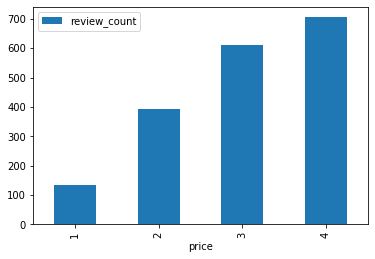

In [21]:
pricereview.plot.bar()

In [11]:
pricedf2 = pricedf.groupby('price').sum()

In [24]:
pricedf2 = pricedf2.reset_index()

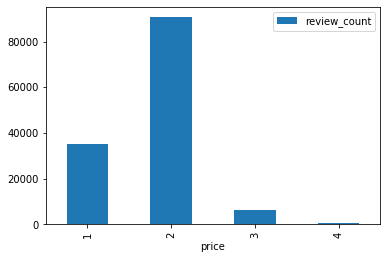

In [14]:
pricedf2.rename(columns={"review_count":"Review Total"} )
pricedf2.rename({'$':1, '$$':2, '$$$':3, '$$$$':4}, inplace=True)
pricedf2.plot.bar()

In [25]:
pricedf2

,price,review_count
0,1,35282
1,2,90589
2,3,6092
3,4,705


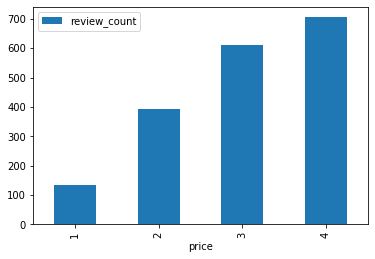

In [19]:
pricereview.rename(columns={"review_count":"Review Average"})
pricereview.rename({'$':1, '$$':2, '$$$':3, '$$$$':4}, inplace=True)
pricereview.plot.bar()

In [27]:
pricereview = pricereview.reset_index()
pricereview

,price,review_count
0,1,134.664122
1,2,393.865217
2,3,609.200000
3,4,705.000000


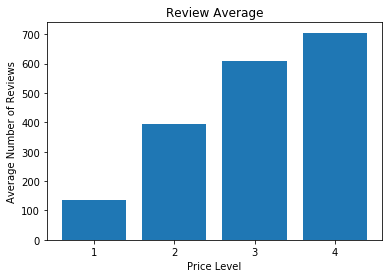

In [28]:
plt.title("Review Average")
plt.xlabel("Price Level")
plt.ylabel("Average Number of Reviews")
plt.xticks([1, 2, 3, 4], ['1', '2', '3', '4' ])
plt.bar((pricereview["price"]), pricereview["review_count"])
plt.show()



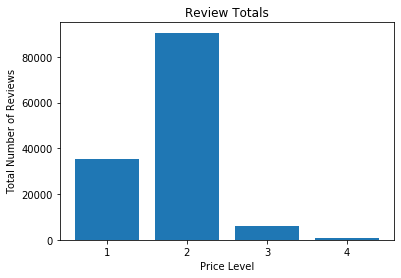

In [26]:
plt.title("Review Totals")
plt.xlabel("Price Level")
plt.ylabel("Total Number of Reviews")
plt.xticks([1, 2, 3, 4], ['1', '2', '3', '4' ])
plt.bar((pricedf2["price"]), pricedf2["review_count"])
plt.show()